In [5]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import cs_key2cs_label, key2label, key2label_auto, output_key2output_label
# Create an input symbol table
auto_syms = fst.SymbolTable()
# create automata representing desired language 
# Add symbols with integer IDs and corresponding strings
# no cars on farm road, highway or emergency

#creates automata symbol and key table where inputs and output for FSTs are concatenated
key_table = np.array([]) #initialize empty table
for emer_key in range(1,3):
    for hcar_key in range(1,3):
        for fcar_key in range(1,3):
            for cs_key in range(1,4):
                for output_key in range(1,4):
                    current_key   = np.array([emer_key, hcar_key, fcar_key, cs_key, output_key])
                    current_label = key2label_auto(current_key)
                    #convert key temporarily to string to combine indices
                    key_str = ''.join(map(str, current_key))

                    # Convert the string to an integer
                    current_key_int = int(key_str)
                    key_table       = np.hstack( (key_table, current_key_int) )
                    auto_syms.add_symbol( current_label , key = current_key_int)



# Create an empty FST
f = fst.Fst()

#add input and output symbol tables
f.set_input_symbols(auto_syms)
f.set_output_symbols(auto_syms)

#add highway green, both red and farm green states
H = f.add_state()
B = f.add_state()
F = f.add_state()

#starts with both lights red
f.set_start( B )
#all states are possible final states
f.set_final( H )
f.set_final( B )
f.set_final( F )

#identity weight 
eye_weight = fst.Weight.One(f.weight_type())

#add stationary transitions for highway green
f.add_arc(H, fst.Arc(11122,11122 , eye_weight, H) )
f.add_arc(H, fst.Arc(12122,12122 , eye_weight, H) )

#add stationary transitions for both red 
f.add_arc(B, fst.Arc(21111, 21111, eye_weight, B) )
f.add_arc(B, fst.Arc(21212, 21212, eye_weight, B) )
f.add_arc(B, fst.Arc(22111, 22111, eye_weight, B) )
f.add_arc(B, fst.Arc(22212, 22212, eye_weight, B) )

#add stationary transitions for farm road green
f.add_arc(F, fst.Arc(11133, 11133, eye_weight, F) )
f.add_arc(F, fst.Arc(11233, 11233, eye_weight, F) )

#add transition both red to highway green
f.add_arc(B, fst.Arc(12112, 12112, eye_weight, H) )
f.add_arc(B, fst.Arc(12212, 12212, eye_weight, H) )

#add transtition both red to farm green
f.add_arc(B, fst.Arc(11213, 11213, eye_weight, F) )
f.add_arc(B, fst.Arc(12213, 12213, eye_weight, F) )

#add transition highway green to both red 
#emergency vehicle present
f.add_arc(H, fst.Arc(21121, 21121, eye_weight, B) )
f.add_arc(H, fst.Arc(21221, 21221, eye_weight, B) )
f.add_arc(H, fst.Arc(22121, 22121, eye_weight, B) )
f.add_arc(H, fst.Arc(22221, 22221, eye_weight, B) )

#no emergency vehicle present
f.add_arc(H, fst.Arc(11221, 11221, eye_weight, B) )
f.add_arc(H, fst.Arc(12221, 12221, eye_weight, B) )

#add transition farm road green to both red 
#emergency vehicle present
f.add_arc(F, fst.Arc(21131, 21131, eye_weight, B) )
f.add_arc(F, fst.Arc(21231, 21231, eye_weight, B) )
f.add_arc(F, fst.Arc(22131, 22131, eye_weight, B) )
f.add_arc(F, fst.Arc(22231, 22231, eye_weight, B) )

#no emergency vehicle present
f.add_arc(F, fst.Arc(12131, 12131, eye_weight, B) )
f.add_arc(F, fst.Arc(12231, 12231, eye_weight, B) )


ImportError: cannot import name 'key2label_auto' from 'TL_funcs' (c:\Users\nsmith3\OneDrive - University of Florida\TL_SIM_python\TL_funcs.py)

In [ ]:
from funcs import supervisor
from funcs import example 

MK,P,As,Aa = example(2, 2)
As
Sup, MK_auto, control_auto, controllable = \
      supervisor(MK=MK,P=P,As=None,Aa=Aa)


In [2]:
import pywrapfst as fst 
f = fst.Fst()

s0 = f.add_state()
s1 = f.add_state()

f.set_start( s0 )

# f.set_final( s0 )
# f.set_final( s1 )
eye_weight = fst.Weight.One(f.weight_type())
f.add_arc(s0, fst.Arc(1,2, eye_weight, s1 )     )
#f.add_arc(s0, fst.Arc(2,2, eye_weight, s1 )     )

#f.add_arc(s1, fst.Arc(2,1, eye_weight, s0 )     )

#fnew = fst.compose(f, f)
#fnew
w = fst.randgen(f, 1) 
w 



In [ ]:
import pywrapfst as fst

# Create a symbol table and add some symbols
symbol_table = fst.SymbolTable()
symbol_table.add_symbol('a', key=1)
symbol_table.add_symbol('b', key=2)
symbol_table.add_symbol('c', key=3)

# Get the number of symbols in the symbol table
num_symbols = symbol_table.num_symbols()

# Iterate through the symbols in the symbol table
for id in range(1, num_symbols + 1):
    symbol = symbol_table.find(id)
    print(f"Symbol: {symbol}, ID: {id}")
    



In [ ]:
import pywrapfst as fst

# Create a symbol table and add some symbols
symbol_table = fst.SymbolTable()
symbol_table.add_symbol('a', key=4)
symbol_table.add_symbol('b', key=2)
symbol_table.add_symbol('c', key=3)

# Iterate through the IDs in the symbol table
for id in symbol_table:
    print(f"ID: {id}")

x = id 
x[1]

In [ ]:
import numpy as np 
# Create a 3-dimensional list with dimensions 2x3x4
my_list = [[['' for _ in range(4)] for _ in range(3)] for _ in range(2)]

# Assign some values to the elements
my_list[0][1][2] = 'a'
my_list[1][0][3] = 'b'
my_list = np.array( my_list )
# Create a different list to fill the last page
different_list = [['x', 'y', 'z', 'w'],
                  ['p', 'q', 'r', 's'],
                  ['m', 'n', 'o', 't']]

different_list = np.array( different_list )
comb = np.concatenate( (different_list[:, :, np.newaxis], different_list[:, :, np.newaxis]), axis = 2)
# Accessing elements in the 3-dimensional list
print(my_list[0][1][2])  # Output: a
print(my_list[1][0][3])  # Output: b
f = np.where( comb == 's')
print(f[0])
print(f[1])
print(f[2])

In [ ]:
from itertools import product
import numpy as np
numbers = ['a', 'b', 'c']
numbers_s = numbers[1:]
repeat = 3  # Set the number of repetitions

all_permutations = list(product(numbers, repeat=repeat))

# Convert tuples to lists
all_permutations_as_lists = [list(t) for t in all_permutations]
perm_array  = np.array(all_permutations) 
s = perm_array.shape[1]
# Concatenate the individual strings
#comb_list = [item[0] + item[1] for item in perm_array]
# Extract the first and second columns for concatenation
first_column = perm_array[:, 0]
second_column = perm_array[:, 1]

# Perform element-wise concatenation
comb_array = np.core.defchararray.add(first_column, second_column)
double = np.hstack( ([], comb_array) )


print(perm_array[0,1] )


In [ ]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()

# Convert the symbol table to a list
symbol_list = [itab.find(index) for index in ikey]

print(symbol_list)  # Output: ['<eps>', 'a', 'b', 'c']


In [ ]:
import pywrapfst as fst

# Create an empty FST
fst1 = fst.Fst()

# Add states to the FST
s0 = fst1.add_state()
s1 = fst1.add_state()
s2 = fst1.add_state()

# Add transitions with different input and output symbols, all with weight 1.0
fst1.add_arc(s0, fst.Arc(1, 2, 1.0, s1))  # Transition: input=1, output=2, weight=1.0
fst1.add_arc(s1, fst.Arc(2, 3, 1.0, s2))  # Transition: input=2, output=3, weight=1.0
fst1.set_start(s0)  # Set initial state
fst1.set_final(s2)  # Set final state

# Print the FST
print("Original FST:")
print(fst1)

# Generate random paths through the FST
num_paths = 3
for i in range(num_paths):
    print(f"\nRandom Path {i + 1}:")
    path = fst.randgen(fst1)
    #print(path)
    path 


Original FST:
0	1	1	2	1
1	2	2	3	1
2


Random Path 1:

Random Path 2:

Random Path 3:


In [ ]:
import pywrapfst as fst

# Create an example FST
fst1 = fst.Fst()
s0 = fst1.add_state()
s1 = fst1.add_state()
s2 = fst1.add_state()
s3 = fst1.add_state()
fst1.add_arc(s0, fst.Arc(1, 2, 1.5, s1))  # Transition: input=1, output=2, weight=1.5
fst1.add_arc(s1, fst.Arc(2, 3, 2.5, s2))  # Transition: input=2, output=3, weight=2.5
fst1.add_arc(s2, fst.Arc(3, 4, 3.5, s3))  # Transition: input=3, output=4, weight=3.5
fst1.set_start(s0)
fst1.set_final(s3)

# Define input symbols
input_symbols = fst.SymbolTable()
input_symbols.add_symbol("1", key=1)
input_symbols.add_symbol("2", key=2)
input_symbols.add_symbol("3", key=3)

# Define output symbols
output_symbols = fst.SymbolTable()
output_symbols.add_symbol("2", key=2)
output_symbols.add_symbol("3", key=3)
output_symbols.add_symbol("4", key=4)

# Set input and output symbol tables
fst1.set_input_symbols(input_symbols)
fst1.set_output_symbols(output_symbols)

# Create input word
input_word = ["1", "2", "3"]

# Find the shortest path and get the output word
output_word = fst.shortestpath(fst1, input_word)
print("Input word:", input_word)
print("Output word:", output_word)


TypeError: must be real number, not list

In [8]:
import pywrapfst as fst

def dfs(state, current_path, current_length, max_length, paths):
    if current_length > max_length:
        return
    if fst.final(fst, state) == fst.Weight.One(fst.WeightType()):
        paths.append(current_path[:])
    if current_length == max_length:
        return
    for arc in fst.arcs(state):
        next_state = arc.nextstate
        new_path = current_path + [arc.ilabel]
        dfs(next_state, new_path, current_length + 1, max_length, paths)

def get_paths_less_than_n(fst, n):
    start_state = fst.start()
    paths = []
    dfs(start_state, [], 0, n, paths)
    return paths

# Example usage:
# Create an FST with identity weight
eye_weight = fst.Weight.One(f.weight_type())
fst1 = fst.Fst()
s = fst1.add_state()
fst1.set_start(s)
t = fst1.add_state()
fst1.set_final(t)
fst1.add_arc(s, fst.Arc(1, 1, eye_weight, t))
fst1.add_arc(s, fst.Arc(2, 2, eye_weight, t))
fst1.add_arc(t, fst.Arc(3, 3, eye_weight, s))

# Print original FST
print("Original FST:")
fst1

# Get all possible paths of length less than 3
all_paths = get_paths_less_than_n(fst1, 3)
print("All possible paths of length less than 3:")
for path in all_paths:
    print("Path:", path)


Original FST:


AttributeError: module 'pywrapfst' has no attribute 'final'

In [14]:
import pywrapfst as fst

def dfs(f, state, current_path, current_length, max_length, paths):
    if current_length > max_length:
        return
    if current_length > 0:  # Append the path if it's not empty
        paths.append(current_path[:])
    if current_length == max_length:  # Reached the maximum length, stop
        return
    for arc in f.arcs(state):
        if arc.ilabel == arc.olabel:  # Check if the input and output labels are the same (identity weight)
            next_state = arc.nextstate
            next_path = current_path + [arc.ilabel]
            dfs(f, next_state, next_path, current_length + 1, max_length, paths)

def get_paths_less_than_n(f, n):
    start_state = f.start()
    paths = []
    dfs(f, start_state, [], 0, n, paths)
    return paths


# Example usage:
# Create an FST with identity weight
eye_weight = fst.Weight.One(f.weight_type())
fst1 = fst.Fst()
s = fst1.add_state()
fst1.set_start(s)
t = fst1.add_state()
fst1.set_final(t)
fst1.add_arc(s, fst.Arc(1, 1, eye_weight, t))
fst1.add_arc(s, fst.Arc(2, 2, eye_weight, t))
fst1.add_arc(t, fst.Arc(3, 3, eye_weight, s))

# Print original FST
print("Original FST:")
fst1

# Get all possible paths of length less than 3
all_paths = get_paths_less_than_n(fst1, 3)
print("All possible paths of length less than 3:")
for path in all_paths:
    print("Path:", path)

Original FST:
All possible paths of length less than 3:
Path: [1]
Path: [1, 3]
Path: [1, 3, 1]
Path: [1, 3, 2]
Path: [2]
Path: [2, 3]
Path: [2, 3, 1]
Path: [2, 3, 2]


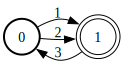

In [15]:
fst1

In [6]:
import numpy as np

# Example 2D NumPy array with duplicate rows
matrix_2d = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [1, 2, 3],
                      [7, 8, 9],
                      [4, 5, 6]])

# Initialize an empty list to store indices of removed rows
removed_indices = []

# Convert NumPy array to list of lists
matrix_list = matrix_2d.tolist()

# Convert list of lists to set of tuples to remove duplicates, then back to list of lists
unique_rows_list = []
seen = set()
for i, row in enumerate(matrix_list):
    row_tuple = tuple(row)
    if row_tuple not in seen:
        unique_rows_list.append(row)
        seen.add(row_tuple)
    else:
        removed_indices.append(i)

# Convert back to NumPy array
unique_rows_2d = np.array(unique_rows_list)

# Print the original and unique matrices
print("Original Matrix:")
print(matrix_2d)

print("\nUnique Matrix:")
print(unique_rows_2d)

print("\nIndices of Removed Rows:", removed_indices)

enumerate(matrix_2d)

Original Matrix:
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [7 8 9]
 [4 5 6]]

Unique Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Indices of Removed Rows: [2, 4]


In [2]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from scipy.linalg import svd 

B = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [1, 2, 3],
                      [7, 8, 9],
                      [4, 5, 6]])

# Create a random sparse matrix
num_rows = 5
num_cols = 3
density = 0.3  # Density of non-zero elements
A = csr_matrix(np.random.rand(num_rows, num_cols) < density)
A = A.astype(float)  # Convert the data type of A to float
r = np.linalg.matrix_rank( A )
# Compute the singular value decomposition (SVD)
k = 3  # Number of singular values and vectors to compute
# U, S, Vt = svds(A, k = k)
U, S, Vt = svd(B)

# U, S, Vt are the left singular vectors, singular values, and right singular vectors respectively
print("Left singular vectors (U):")
print(U)
print("\nSingular values (S):")
print(S)
print("\nRight singular vectors (Vt):")
print(Vt)


Left singular vectors (U):
[[-0.1879084  -0.62710594  0.25178506 -0.71009853 -0.06158674]
 [-0.4537054  -0.09185384 -0.70515007 -0.00226884 -0.53709637]
 [-0.1879084  -0.62710594  0.2629813   0.7039196  -0.08225938]
 [-0.71950239  0.44339826  0.51476636 -0.00617893 -0.14384612]
 [-0.4537054  -0.09185384 -0.32438264  0.01462671  0.82478861]]

Singular values (S):
[1.93385236e+01 1.42179697e+00 9.84964523e-16]

Right singular vectors (Vt):
[[-0.46756293 -0.57112461 -0.67468629]
 [ 0.78403969  0.08455776 -0.61492418]
 [-0.40824829  0.81649658 -0.40824829]]


<string>:6: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.


In [ ]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

H_b = Hz_array[:, :, 0]

H_b = H_b.astype('float64') 

num_states = np.linalg.matrix_rank(H_b)

# SVD decomposition of H_b subblock
U, SING, V = svd(H_b)
SING 

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds

# Convert Hb_list to a compatible data type (e.g., float)
Hb_list_float = Hb_list.astype(float)

# Compute the singular value decomposition (SVD)
U, S, Vt = svds(Hb_list_float)

# The rank of the matrix is the number of non-zero singular values
rank = np.sum(S > 1e-12)  # Tolerance level to consider singular values non-zero

print("Rank of the matrix:", rank)
As_auto
